<a href="https://colab.research.google.com/github/Donya-Vafanejad/covid19_twees/blob/main/Covid_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
import numpy as np
import re
import string
import nltk


In [4]:
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopword')
nltk.download('vader_lexicon')

from collections import Counter

from matplotlib import pyplot as pyplot
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style = 'darkgrid')



/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Error loading stopword: Package 'stopword' not found in
[nltk_data]     index
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [5]:
df = pd.read_csv('covid19_tweets.csv', encoding= 'unicode_escape')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,áá¥â»Õ¬ê Ï®,astroworld,wednesday addams as a disney princess keepin i...,5/26/2017 5:46,624.0,950.0,18775.0,False,7/25/2020 12:27,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile ðºð¸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",4/16/2009 20:06,2253.0,1677.0,24.0,True,7/25/2020 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2/28/2009 18:57,9275.0,9525.0,7254.0,False,7/25/2020 12:27,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,3/7/2019 1:45,197.0,987.0,1488.0,False,7/25/2020 12:27,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,ðï¸Official Twitter handle of Department o...,2/12/2017 6:45,101009.0,168.0,101.0,False,7/25/2020 12:27,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [6]:

df.shape

(159613, 13)

In [7]:
needed_columns = ['user_name', 'date', 'text']
df = df[needed_columns]
df.head()

,user_name,date,text
0,áá¥â»Õ¬ê Ï®,7/25/2020 12:27,If I smelled the scent of hand sanitizers toda...
1,Tom Basile ðºð¸,7/25/2020 12:27,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,7/25/2020 12:27,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,7/25/2020 12:27,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,7/25/2020 12:27,25 July : Media Bulletin on Novel #CoronaVirus...


In [8]:
df.user_name = df.user_name.astype('category')
df.user_name = df.user_name.cat.codes 

df.date = pd.to_datetime(df.date).dt.date
df.head()

,user_name,date,text
0,82387,2020-07-25,If I smelled the scent of hand sanitizers toda...
1,70146,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,69908,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,77670,2020-07-25,@brookbanktv The one gift #COVID19 has give me...
4,16870,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...


In [9]:
texts = df['text']
texts
df. dropna()


,user_name,date,text
0,82387,2020-07-25,If I smelled the scent of hand sanitizers toda...
1,70146,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,69908,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,77670,2020-07-25,@brookbanktv The one gift #COVID19 has give me...
4,16870,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...
...,...,...,...
159607,44260,2020-08-22,For all the brainwashed #COVID19 face mask wea...
159608,60459,2020-08-22,In an effort to buffer the agricultural sector...
159609,35257,2020-08-22,@piersmorgan S'funny - on #Covid19 most of the...
159610,932,2020-08-22,@NaviMumbaiNet @rajanvichare @navimumbaicv @NM...


In [10]:
remove_url = lambda x: re.sub(r'http\S+', '', str(x))
text_lr = texts.apply(remove_url)
text_lr

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
159608    In an effort to buffer the agricultural sector...
159609    @piersmorgan S'funny - on #Covid19 most of the...
159610    @NaviMumbaiNet @rajanvichare @navimumbaicv @NM...
159611    #DoubleStandards \n\n- blur the line between R...
159612                                                  nan
Name: text, Length: 159613, dtype: object

In [11]:
to_lower = lambda x: x.lower()
texts_lr_lc = text_lr.apply(to_lower)
texts_lr_lc

0         if i smelled the scent of hand sanitizers toda...
1         hey @yankees @yankeespr and @mlb - wouldn't it...
2         @diane3443 @wdunlap @realdonaldtrump trump nev...
3         @brookbanktv the one gift #covid19 has give me...
4         25 july : media bulletin on novel #coronavirus...
                                ...                        
159608    in an effort to buffer the agricultural sector...
159609    @piersmorgan s'funny - on #covid19 most of the...
159610    @navimumbainet @rajanvichare @navimumbaicv @nm...
159611    #doublestandards \n\n- blur the line between r...
159612                                                  nan
Name: text, Length: 159613, dtype: object

In [12]:
remove_puncs = lambda x: x.translate(str.maketrans('','', string.punctuation))
texts_lr_lc_np = texts_lr_lc.apply(remove_puncs)
texts_lr_lc_np

0         if i smelled the scent of hand sanitizers toda...
1         hey yankees yankeespr and mlb  wouldnt it have...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv the one gift covid19 has give me i...
4         25 july  media bulletin on novel coronavirusup...
                                ...                        
159608    in an effort to buffer the agricultural sector...
159609    piersmorgan sfunny  on covid19 most of the cou...
159610    navimumbainet rajanvichare navimumbaicv nmmcco...
159611    doublestandards \n\n blur the line between rig...
159612                                                  nan
Name: text, Length: 159613, dtype: object

Removing stopwords

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words = set(stopwords.words('english'))
more_words = ['covid','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic','nan' ,'#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19']

stop_words.update(more_words)
remove_words = lambda x : ' '.join([word for word in x.split() if word not in stop_words])
texts_lr_lc_np_ns = texts_lr_lc_np.apply(remove_words)
texts_lr_lc_np_ns


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0         smelled scent hand sanitizers today someone pa...
1         hey yankees yankeespr mlb wouldnt made sense p...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv one gift give appreciation simple ...
4         25 july media bulletin novel coronavirusupdate...
                                ...                        
159608    effort buffer agricultural sector shock specia...
159609    piersmorgan sfunny country agrees meghan peopl...
159610    navimumbainet rajanvichare navimumbaicv nmmcco...
159611    doublestandards blur line right wrong justify ...
159612                                                     
Name: text, Length: 159613, dtype: object

Creating a big list of words out of all the tweets

In [14]:
words_list = [word for line in texts_lr_lc_np_ns for word in line.split()]
words_list

['smelled',
 'scent',
 'hand',
 'sanitizers',
 'today',
 'someone',
 'past',
 'would',
 'think',
 'intoxicated',
 'thatâ\x80¦',
 'hey',
 'yankees',
 'yankeespr',
 'mlb',
 'wouldnt',
 'made',
 'sense',
 'players',
 'pay',
 'respects',
 'aâ\x80¦',
 'diane3443',
 'wdunlap',
 'realdonaldtrump',
 'trump',
 'never',
 'claimed',
 'hoax',
 'claim',
 'effort',
 'toâ\x80¦',
 'brookbanktv',
 'one',
 'gift',
 'give',
 'appreciation',
 'simple',
 'things',
 'always',
 'around',
 'meâ\x80¦',
 '25',
 'july',
 'media',
 'bulletin',
 'novel',
 'coronavirusupdates',
 'kansalrohit69',
 'drsyedsehrish',
 'airnewsalerts',
 'aniâ\x80¦',
 'deaths',
 'continue',
 'rise',
 'almost',
 'bad',
 'ever',
 'politicians',
 'businesses',
 'wantâ\x80¦',
 'change',
 'work',
 'general',
 'recruiting',
 'specifically',
 'via',
 'proactivetalent',
 'recruitingâ\x80¦',
 'wear',
 'face',
 'coverings',
 'shopping',
 'includes',
 'visit',
 'local',
 'community',
 'pharmacyâ\x80¦',
 'praying',
 'good',
 'health',
 'recovery',
 

In [15]:
words_list[:5]

['smelled', 'scent', 'hand', 'sanitizers', 'today']

In [16]:
word_counts = Counter(words_list).most_common(50)
words_df = pd.DataFrame(word_counts)
words_df.columns = ['words', 'frq']

px.bar(words_df, x ='words', y ='frq', title ='Most common words' )


In [17]:
df.head()

,user_name,date,text
0,82387,2020-07-25,If I smelled the scent of hand sanitizers toda...
1,70146,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,69908,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,77670,2020-07-25,@brookbanktv The one gift #COVID19 has give me...
4,16870,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...


In [18]:
df.text = texts_lr_lc_np_ns
df.head()

,user_name,date,text
0,82387,2020-07-25,smelled scent hand sanitizers today someone pa...
1,70146,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...
2,69908,2020-07-25,diane3443 wdunlap realdonaldtrump trump never ...
3,77670,2020-07-25,brookbanktv one gift give appreciation simple ...
4,16870,2020-07-25,25 july media bulletin novel coronavirusupdate...


Sentiment Analysis

In [19]:
sid = SentimentIntensityAnalyzer()
ps =  lambda x: sid.polarity_scores(x)
sentiment_scores = df.text.apply(ps)
sentiment_scores

0         {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...
1         {'neg': 0.11, 'neu': 0.709, 'pos': 0.181, 'com...
2         {'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'comp...
3         {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'comp...
4         {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...
                                ...                        
159608    {'neg': 0.195, 'neu': 0.602, 'pos': 0.203, 'co...
159609    {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...
159610    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
159611    {'neg': 0.279, 'neu': 0.721, 'pos': 0.0, 'comp...
159612    {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...
Name: text, Length: 159613, dtype: object

In [20]:
sentiment_df = pd.DataFrame(data = list(sentiment_scores))
sentiment_df.head()

,neg,neu,pos,compound
0,0.00,0.758,0.242,0.4939
1,0.11,0.709,0.181,0.2263
2,0.00,0.832,0.168,0.2057
3,0.00,0.563,0.437,0.7351
4,0.00,0.796,0.204,0.3182


In [21]:
labelize = lambda x : 'neutral' if x ==0 else('positove' if x>0 else 'negative')
sentiment_df['label'] = sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,label
0,0.00,0.758,0.242,0.4939,positove
1,0.11,0.709,0.181,0.2263,positove
2,0.00,0.832,0.168,0.2057,positove
3,0.00,0.563,0.437,0.7351,positove
4,0.00,0.796,0.204,0.3182,positove


In [22]:
df.head()

,user_name,date,text
0,82387,2020-07-25,smelled scent hand sanitizers today someone pa...
1,70146,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...
2,69908,2020-07-25,diane3443 wdunlap realdonaldtrump trump never ...
3,77670,2020-07-25,brookbanktv one gift give appreciation simple ...
4,16870,2020-07-25,25 july media bulletin novel coronavirusupdate...


In [23]:
data = df.join(sentiment_df.label)
data.head()

,user_name,date,text,label
0,82387,2020-07-25,smelled scent hand sanitizers today someone pa...,positove
1,70146,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...,positove
2,69908,2020-07-25,diane3443 wdunlap realdonaldtrump trump never ...,positove
3,77670,2020-07-25,brookbanktv one gift give appreciation simple ...,positove
4,16870,2020-07-25,25 july media bulletin novel coronavirusupdate...,positove


In [24]:
counts_df = data.label.value_counts().reset_index()
counts_df

,index,label
0,positove,62823
1,neutral,55512
2,negative,41278


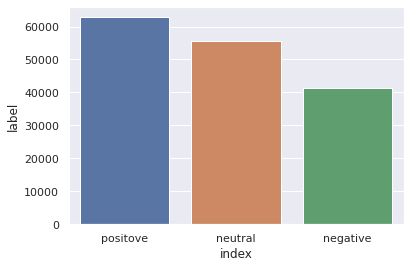

In [25]:
sns.barplot(x= 'index', y = 'label', data = counts_df)

In [26]:
data.head()

,user_name,date,text,label
0,82387,2020-07-25,smelled scent hand sanitizers today someone pa...,positove
1,70146,2020-07-25,hey yankees yankeespr mlb wouldnt made sense p...,positove
2,69908,2020-07-25,diane3443 wdunlap realdonaldtrump trump never ...,positove
3,77670,2020-07-25,brookbanktv one gift give appreciation simple ...,positove
4,16870,2020-07-25,25 july media bulletin novel coronavirusupdate...,positove


In [27]:
data_agg = data[['user_name', 'date', 'label']].groupby(['date', 'label']).count().reset_index()
data_agg.columns = ['date', 'label', 'counts']
data_agg.head()

,date,label,counts
0,2020-07-24,negative,84
1,2020-07-24,neutral,96
2,2020-07-24,positove,115
3,2020-07-25,negative,4326
4,2020-07-25,neutral,5799


In [28]:
px.line(data_agg, x ='date', y = 'counts', color='label', title = 'daily tweets sentimental Analysis')